<a href="https://colab.research.google.com/github/ifrah9/CODSOFT/blob/main/codsoft_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import subprocess

# Command to unzip the file
command = 'unzip "/content/archive (3).zip"'

# Execute the command
subprocess.call(command, shell=True)

0

In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


In [ ]:
data = pd.read_csv('/content/spam.csv',encoding='latin-1',delimiter=',', skiprows=0)

In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data= data[['v1', 'v2']]
data.columns = ['label', 'message']

In [ ]:
# encoding spam:1 ham:0
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [ ]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
y_pred_nb = nb_classifier.predict(X_test_tfidf)
print("Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classifier
Accuracy: 0.9668161434977578
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [ ]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
y_pred_lr = lr_classifier.predict(X_test_tfidf)
print("Logistic Regression Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier
Accuracy: 0.9524663677130045
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [ ]:
svm_classifier = LinearSVC()
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_test_tfidf)
print("Support Vector Machine Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine Classifier
Accuracy: 0.97847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



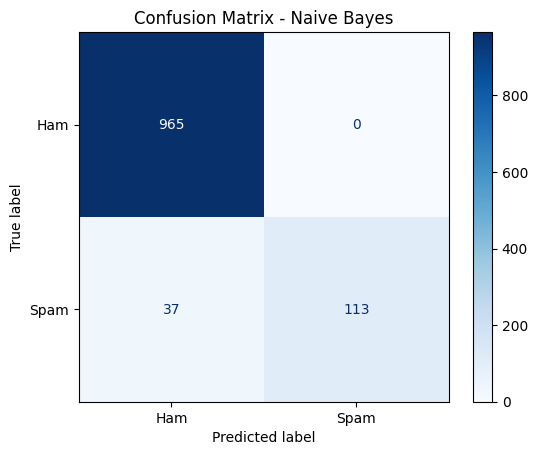

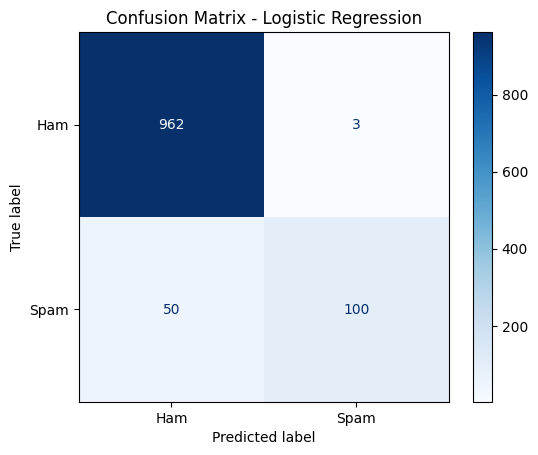

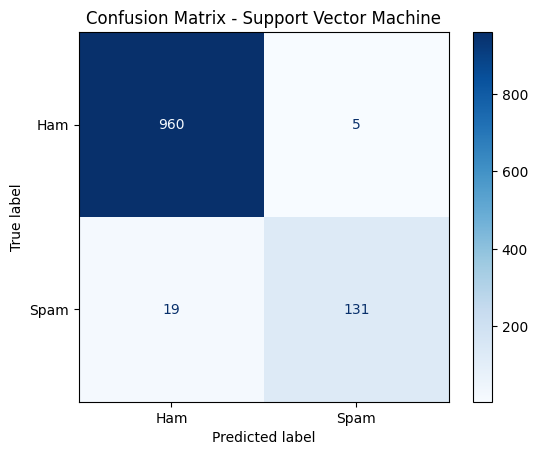

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

classifiers = {
    'Naive Bayes': nb_classifier,
    'Logistic Regression': lr_classifier,
    'Support Vector Machine': svm_classifier
}

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


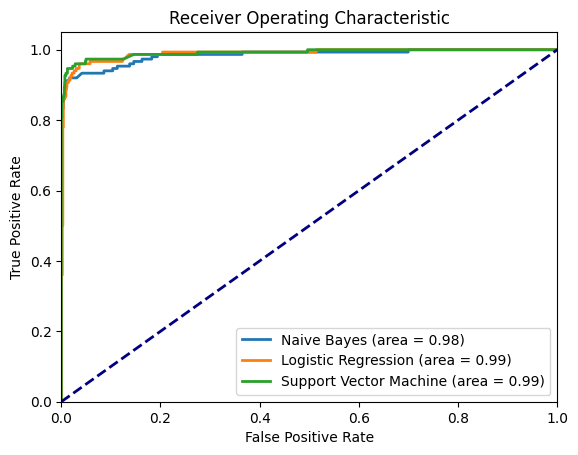

In [ ]:
plt.figure()
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        y_pred_prob = clf.predict_proba(X_test_tfidf)[:, 1]
    else:  # Use decision function for SVM
        y_pred_prob = clf.decision_function(X_test_tfidf)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


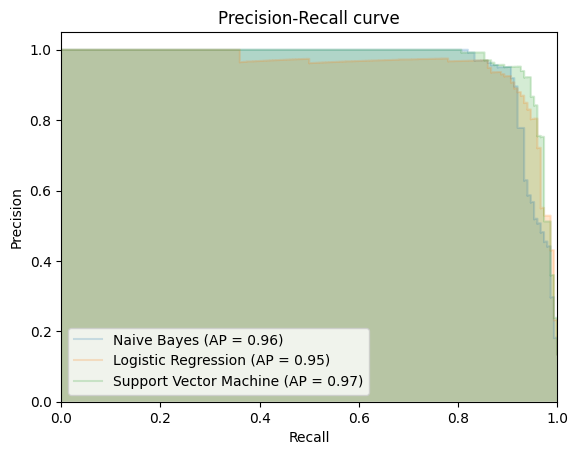

In [ ]:
plt.figure()
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        y_pred_prob = clf.predict_proba(X_test_tfidf)[:, 1]
    else:  # Use decision function for SVM
        y_pred_prob = clf.decision_function(X_test_tfidf)

    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    average_precision = average_precision_score(y_test, y_pred_prob)
    plt.step(recall, precision, where='post', alpha=0.2, label=f'{name} (AP = {average_precision:0.2f})')
    plt.fill_between(recall, precision, step='post', alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()
